# Visualização de dados

Neste módulo vamos introduzir a biblioteca [`matpoltlib`](https://matplotlib.org/) para visualização de dados.

Esta mesma biblioteca é utilizada pelo Octave para a visualização de dados.

## Tabelas

Uma tabela, do tipo `pandas.DataFrame` é uma estrutura de dados multidimensional.

Vamos usar uma pequena tabela que tem os dados organizados em três colunas:

1. A primeira coluna (`'Ano'`) refere-se ao ano
1. A segunda coluna tem a correspondente taxa bruta de natalidade (`'Natalidade'`)
1. A terceira coluna tem a correspondente taxa bruta de mortalidade (`'Mortalidade'`). 

Estes dados referem-se à Taxa Bruta de Natalidade e Taxa Bruta de Mortalidade. Esta taxas são calculadas para cada 1000 habitantes (dados do INE).

In [1]:
import pandas

população = pandas.DataFrame({
    'Ano': [ 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018 ],
    'Natalidade': [ 9.2, 8.5, 7.9, 7.9, 8.3, 8.4, 8.4, 8.5 ],
    'Mortalidade': [ 9.7, 10.2, 10.2, 10.1, 10.5, 10.7, 10.7, 11.0 ]
})

Vamos usar esta tabela nos exemplos seguintes. Comecemos por ver a informação contida na tabela.

### Consultar a tabela

Basta escrever `população` e é-nos apresentado o conteúdo da tabela. Esta visualização funciona bem, porque a tabela é muito pequena.

In [2]:
população

,Ano,Natalidade,Mortalidade
0,2011,9.2,9.7
1,2012,8.5,10.2
2,2013,7.9,10.2
3,2014,7.9,10.1
4,2015,8.3,10.5
5,2016,8.4,10.7
6,2017,8.4,10.7
7,2018,8.5,11.0


### Primeiro gráfico

Vamos mostrar num gráfico os valores da Taxa Brutade Mortalidade, para cada um dos anos.

Começamos por importar a biblioteca, à qual associamos o nome `plt`.

Para o eixo dos `x`, escolhemos a coluna `Ano`. No eixo dos `y`, colocamos a taxa bruta de mortalidade.

Vamos usar um __gráfico de dispersão__ `plt.scatter()`, que muitas vezes são usados como a primeira opção para visualização, para percebermos a distribuição dos dados.


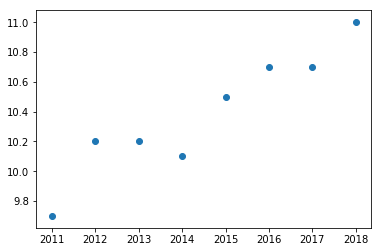

In [3]:
import matplotlib.pyplot as plt

x = população.Ano
y = população.Mortalidade
plt.scatter( x, y)

### Exercício

Apresente o gráfico de dispersão da Taxa Bruta de Natalidade.

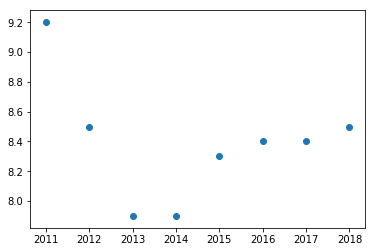

In [4]:
plt.scatter( população.Ano, população.Natalidade)

### Tipos de gráficos

Os gráficos de dispersão são uma boa abordagem para um gráfico inicial, quando ainda não se conhecem bem os dados.

Vamos experimentar outros tipos de gráficos.

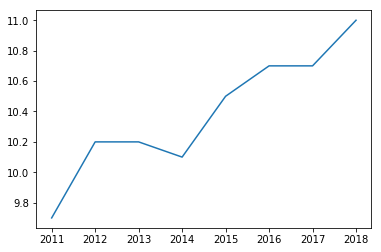

In [5]:
plt.plot( população.Ano, população.Mortalidade)

<BarContainer object of 8 artists>

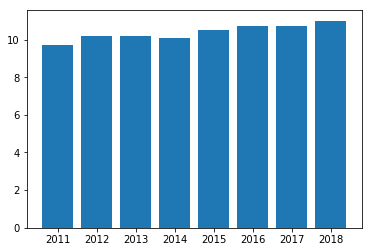

In [6]:
plt.bar( população.Ano, população.Mortalidade)

Juntando as duas séries, e adicionando uma pequena legenda.

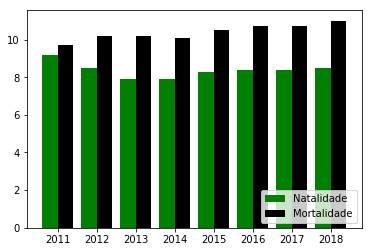

In [7]:
plt.bar( população.Ano-0.2, população.Natalidade, width=0.4, color="green")
plt.bar( população.Ano+0.2, população.Mortalidade, width=0.4, color="black")
plt.legend([ 'Natalidade', 'Mortalidade'], loc='lower right')

### Estilo do gráfico

A apresentação do gráfico pode ser personalizada. A maneira mais fácil é escolher uma dos múltiplos [estilos existentes](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html).

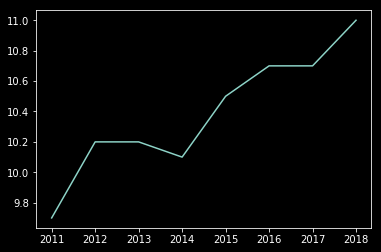

In [8]:
plt.style.use('dark_background')
plt.plot( população.Ano, população.Mortalidade)

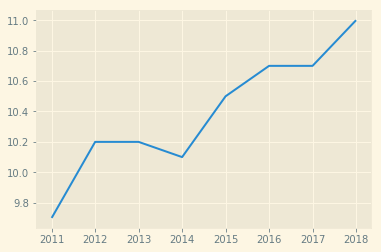

In [9]:
plt.style.use('Solarize_Light2')
plt.plot( população.Ano, população.Mortalidade)

Além do estilo, existe ainda mais algumas funções que permitem alterar a forme de desenho, como este `plt.xkcd()`, que dá o mesmo efeito dos cartoons do [xkcd](https://xkcd.com/).

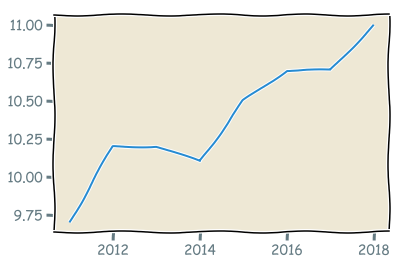

In [10]:
plt.xkcd()
plt.plot( população.Ano, população.Mortalidade)

### Exercício
Descobra um outro estilo ao seu gosto e use-o aqui, aplicado ao mesmos dados anteriores.

### Estilo padrão
Para voltar ao estilo padrão, usar `plt.style.use('default')`.

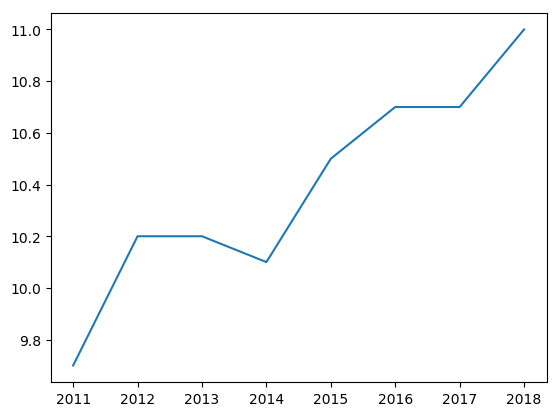

In [11]:
plt.style.use('default')
plt.plot( população.Ano, população.Mortalidade)

### Gráfico de setores ou gráfico circular
Estão gráficos são muito apropriados para se perceber a proporção entre variáveis.

Text(0.5, 0, 'Taxas em 2018')

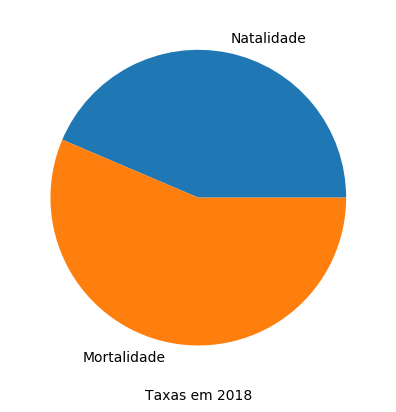

In [12]:
colunas = ['Natalidade', 'Mortalidade']
valores = população[ população.Ano == 2018][ colunas ].values
plt.pie(valores[0], labels=colunas)
plt.xlabel("Taxas em 2018")

Outro exemplo. que se se usa o parâmetro `explode` para destacar um dos elementos.

Text(0.5, 0, 'Legislativas de 2015')

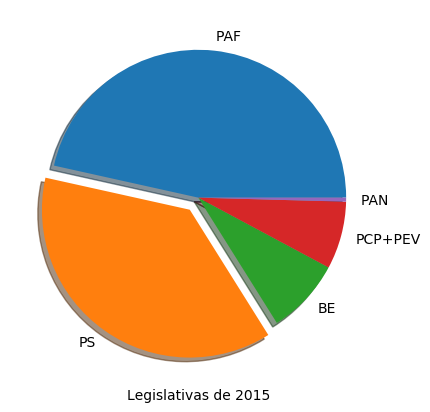

In [13]:
partidos = 'PAF', 'PS', 'BE', 'PCP+PEV', 'PAN'
deputados = [ 107, 86, 19, 17, 1 ]
# destaca o segundo elemento da lista
explode = (0, 0.1, 0, 0, 0)
plt.pie(deputados, explode=explode, labels=partidos, shadow=True)
plt.xlabel("Legislativas de 2015")

### Exercício

Sabendo que o Sporting Clube de Braga, num temporada anterior, ao fim de 19 jogos, tinha conseguido:

    11 vitórias,
    3 empates,
    5 derrotas.

Faça um gráfico de setores que represente a proporção entre vitórias, empates e derrotas.

Tente fazer um gráfico o mais semelhante possível com o que foi feito no Octave.
![](imagens/braga.png)

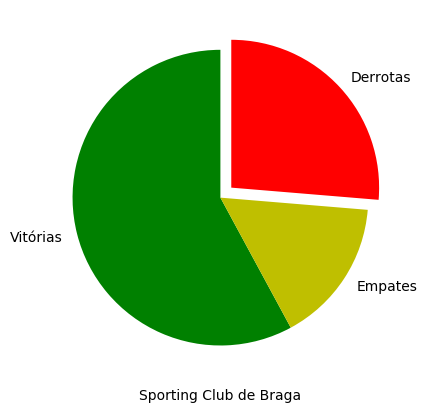

In [14]:
resultados = 'Vitórias', 'Empates', 'Derrotas'
jogos = [ 11, 3, 5 ]
explode = (0, 0, 0.1)
colors = ['g','y','r']
plt.xlabel("Sporting Club de Braga", verticalalignment='top')
plt.pie(jogos, explode=explode, labels=resultados, colors=colors, startangle=90.0)
plt.show()

### Acrescentar alguma matemática

Olhe para o gráfico da mortalidade apresentado. A taxa de mortalidade está a crescer ou a diminuir? Qual será o valor em 2019?

A estatística pode dar uma ajuda e o módulo `scipy.stats` também, pois permite-nos calcular uma [regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear) a partir dos dados que já temos em relação à taxa de mortalidade bruta.

Nota: se não tem o módulo `scipy` instalado, instale-o com o `pip` ou com o `conda` do Anaconda. No Linux, poderá fazer: `sudo pip3 install scipy`, para instalar este módulo.

Sendo `x` e `y`:
```python
x = população.Ano
y = população.Mortalidade
```
Podemos calcular a regressão linear da seguinte forma:
```python
stats = linregress(x, y)

m = stats.slope
b = stats.intercept
```
em que os coeficientes `m` e `b` são os habituais para uma linha `y = mx + b`. Em particular, o coeficiente `m` dá-nos o declive, que nos diz se esta taxa tem crescido, está estável ou tem diminuído.

Sabendo os coeficientes `m` e `b`, usando a equação `y = mx + b`, podemos estimar a taxa de moralidade em 2019.

In [15]:
from scipy.stats import linregress
stats = linregress(x, y)

m = stats.slope
b = stats.intercept
coef = stats.rvalue

taxa_2019 = m * 2019 + b
print( "Taxa de Mortalidade Bruta estimada para 2019: {:0.1f}".format( taxa_2019 ) )
print( "O coeficiente quadrado desta relação é: {:0.3f}".format(coef**2) )

Taxa de Mortalidade Bruta estimada para 2019: 11.1
O coeficiente quadrado desta relação é: 0.897


A mesma regressão se poderia calcular para a natalidade:

In [16]:
stats = linregress(população.Ano, população.Natalidade)

m_n = stats.slope
b_n = stats.intercept

**Nota:**

Para a taxa bruta de natalidade (para este conjunto de anos), não é possível estabelecer uma relação tão boa como na mortalidade. Isso é muito fácil de ver com um outro resultado do cálculo da regressão linear (o [coeficiente de determinação](https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o)):

Para a mortalidade:
```python
stats = linregress(x, y)
coef = stats.rvalue
print(coef**2)
0.8974737775151429
```

Para a natalidade:
```python
stats = linregress(população.Ano, população.Natalidade)
coef = stats.rvalue
print(coef**2)
0.06238859180035636
```

O coeficiente quadrado da taxa de mortalidade é perto de 1, o que significa que há uma boa relação. Já o coeficiente quadrado da taxa de natalidade é perto de 0. Significa que não há uma relação linear entre o ano e a taxa bruta de natalidade.

### Gráfico com duas séries

No gráfico seguinte, juntamos duas visualizações. O eixo dos `x` é o mesmo. No eixo dos `y`, mostramos os valores da taxa de mortalidade e a relação linear entre o ano e a taxa de mortalidade bruta. A regressão linear está desenhada a vermelho, para se ver melhor.

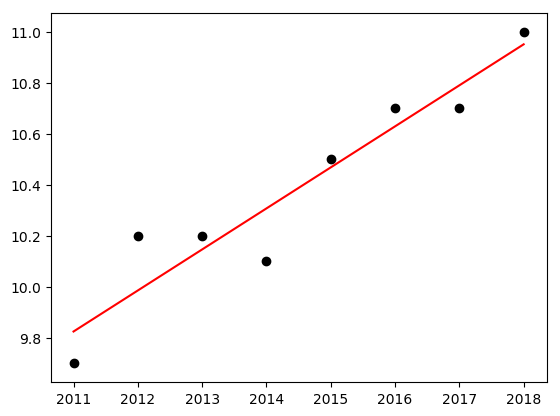

In [17]:
plt.scatter( x, y, color="black")
plt.plot(x, m * x + b, color="red")

O gráfico apresentado, permite ver uma tendência clara de aumento da Taxa Bruta de Mortalidade.

Vamos melhorar o gráfico anterior, com um título em cada um dos eixos e com uma grelha.

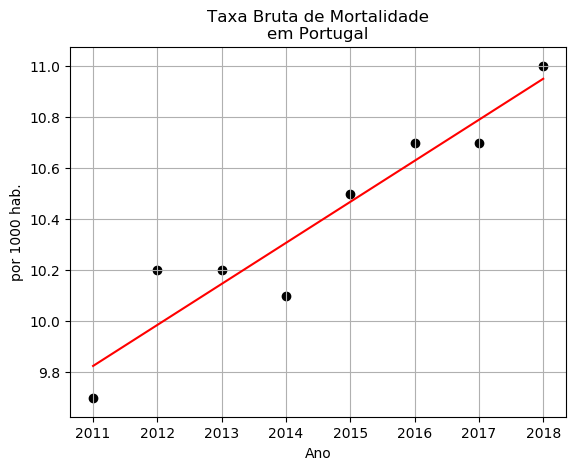

In [18]:
plt.scatter( x, y, color="black")
plt.plot(x, m * x + b, color="red")

plt.xlabel("Ano")
plt.ylabel("por 1000 hab.")
plt.title("Taxa Bruta de Mortalidade\nem Portugal")
plt.grid()

### Compor gráficos

No exemplo seguinte, vamos colocar na mesma figura dois gráficos. Vamos ter dois subgráficos, dispostos numa linha, com duas colunas.

Repare que se usa o método `plt.subplot()` com três argumentos: os dois primeiros referm-se à geometria dos subgráficos: 1 linha, 2 colunas; o último (1 ou 2), refere-se ao índice do gráfico que vou desenhar.

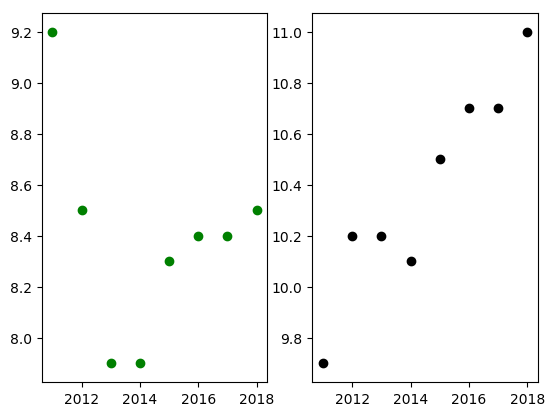

In [19]:
plt.subplot(1, 2, 1)
plt.scatter( população.Ano, população.Natalidade, color="green")
plt.subplot(1, 2, 2)
plt.scatter( população.Ano, população.Mortalidade, color="black")

De forma análoga, se se quiserem juntar quatro gráficos na mesma figura, podemos criar uma geometria de duas linhas por duas colunas (2x2), como é ilustrado na figura seguinte:

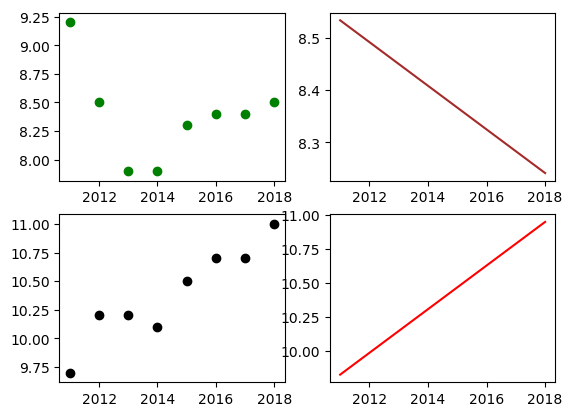

In [20]:
plt.subplot(2, 2, 1)
plt.scatter( população.Ano, população.Natalidade, color="green")
plt.subplot(2, 2, 2)
plt.plot(x, m_n * x + b_n, color="brown")
plt.subplot(2, 2, 3)
plt.scatter( população.Ano, população.Mortalidade, color="black")
plt.subplot(2, 2, 4)
plt.plot(x, m * x + b, color="red")

#### Compor o mesmo gráfico, de uma forma diferente

O `pyplot` existe a noção de figura atual. Ou seja, quando estamos a preparar um gráfico, estamos a configurar a figura atual. No Jupyter, em cada célula criamos e modificamos a figura dessa célula. Na célula seguinte, a figura é outra e assim sucessivamente. Por isso, no Jupyter não nos precisamos de preocupar muito com este conceito, se só estamos a produzir gráficos simples.

Contudo, torna-se mais claro dar nomes aos diferentes objectos que compõem o gráfico.

Vamos escrever mais duas formas alternativas de compor o mesmo gráfico.

O gráfico anterior pode ser definido da seguinte forma:

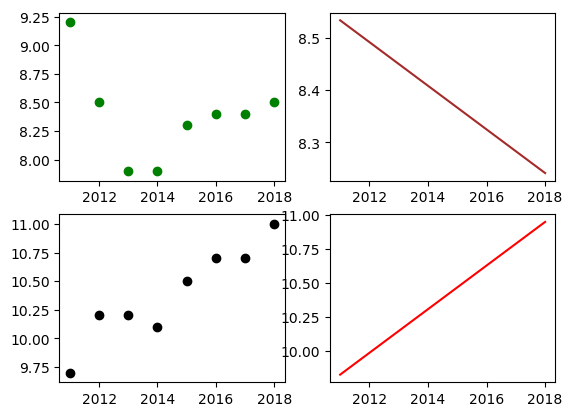

In [21]:
fig = plt.figure()
ax_natal = fig.add_subplot(2, 2, 1)
ax_natal.scatter( população.Ano, população.Natalidade, color="green")

ax_regressao_n = fig.add_subplot(2, 2, 2)
ax_regressao_n.plot(x, m_n * x + b_n, color="brown")

ax_mortal = fig.add_subplot(2, 2, 3)
ax_mortal.scatter( população.Ano, população.Mortalidade, color="black")

ax_regressao = fig.add_subplot(2, 2, 4)
ax_regressao.plot(x, m * x + b, color="red")

Esta notação torna mais fácil e mais clara a manipulação dos diferentes objectos da figura. Passa a ter objectos que representam a figura em si (`fig`), e cada um dos eixos (`ax_natal, ax_regressao_n, ax_mortal, ax_regressao`).

À medida que for construíndo gráficos mais complexos, verá que esta notação torna mais claro o manuseamento das diferentes componentes do gráfico.

Podemos usar uma outra forma ainda mais compacta, que cria os mesmos objectos, e que é a forma mais indicada.

**Vamos usar esta preferencialmente esta forma**, para os gráficos mais complexos.

<Figure size 640x480 with 0 Axes>

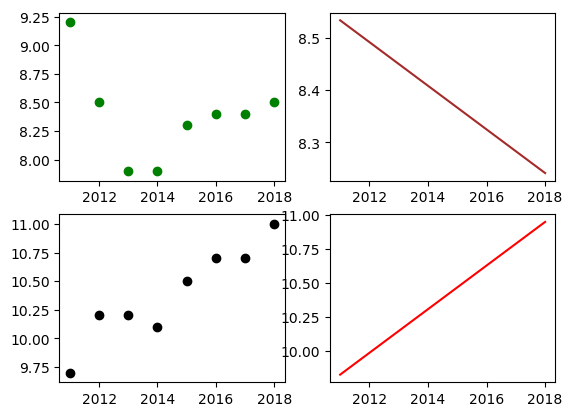

In [22]:
fig = plt.figure()
fig, ((ax_natal, ax_regressao_n), (ax_mortal, ax_regressao)) = plt.subplots(2, 2)
ax_natal.scatter( população.Ano, população.Natalidade, color="green")
ax_regressao_n.plot(x, m_n * x + b_n, color="brown")
ax_mortal.scatter( população.Ano, população.Mortalidade, color="black")
ax_regressao.plot(x, m * x + b, color="red")

### Alargar o tamanho do gráfico

Pode-se alterar as propriedades da figura que é criada, quando nada é dito. No exemplo seguinte, vamos explicitamente criar uma figura com o dobro da largura, para acomodar melhor os dois gráficos lado a lado.

As dimensões predefinidas são: 6.4" por 4.8" polegadas (sendo 1" igual a 25.4 mm). Ou seja, em mm, um gráfico tem as dimensões 162.56 mm de largura por 121.92 mm de altura.

Vamos duplicar a largura predefinida, para 12.8".

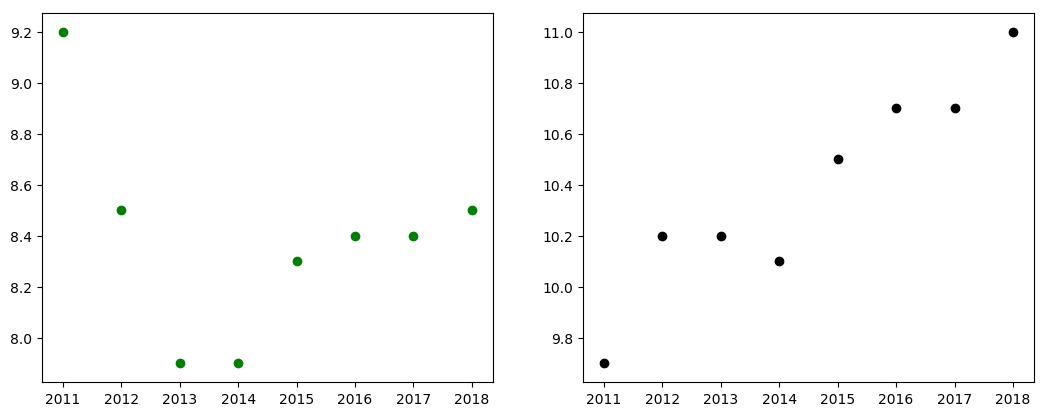

In [23]:
fig, (ax_natal, ax_mortal) = plt.subplots(1, 2, figsize=( 12.8, 4.8))

ax_natal.scatter( população.Ano, população.Natalidade, color="green")
ax_mortal.scatter( população.Ano, população.Mortalidade, color="black")

### Partilhar eixos
Repare que até aqui temos juntado gráficos na mesma figura, mas sempre independentes. Neste caso, pode-se melhorar a informação passada pelos gráficos, usando os mesmos valores em y. Ou seja, tornando o eixo dos `y` comum aos dois gráficos da figura.

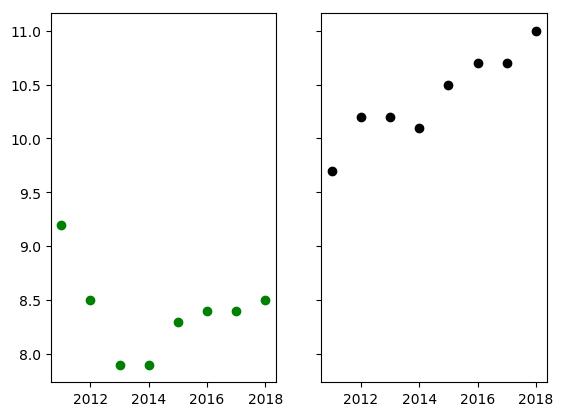

In [24]:
fig, (ax_natal, ax_mortal) = plt.subplots(1, 2, sharey=True)

ax_natal.scatter( população.Ano, população.Natalidade, color="green")
ax_mortal.scatter( população.Ano, população.Mortalidade, color="black")

### Gráficos 3D

Nesta introdução não se abordam os gráficos 3D, mas fica desde já a saber que esta biblioteca permite criar gráficos 3D.

<BarContainer object of 8 artists>

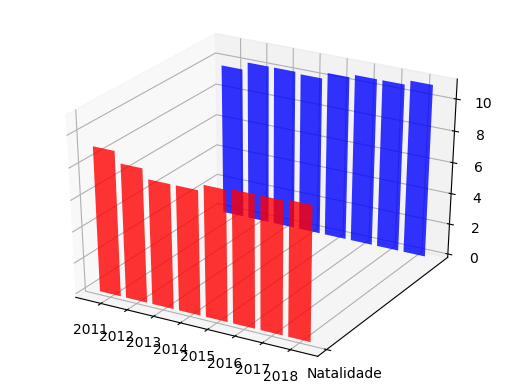

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.yticks( [0, 1], [ '', 'Natalidade', 'Mortalidade' ] )

ax.bar(população.Ano, população.Natalidade, zs=1, zdir='y', color='r', alpha=0.8)
ax.bar(população.Ano, população.Mortalidade, zs=2, zdir='y', color='b', alpha=0.8)

### Gráficos interativos

O comportamenteo padrão do Jupyter é incluir os gráficos `inline`, como temos visto até aqui.

Pode-se alterar esse comportamento com uma instrução mágica (instruções começadas por `%`):
```
%matplotlib notebook
```

<IPython.core.display.Javascript object>


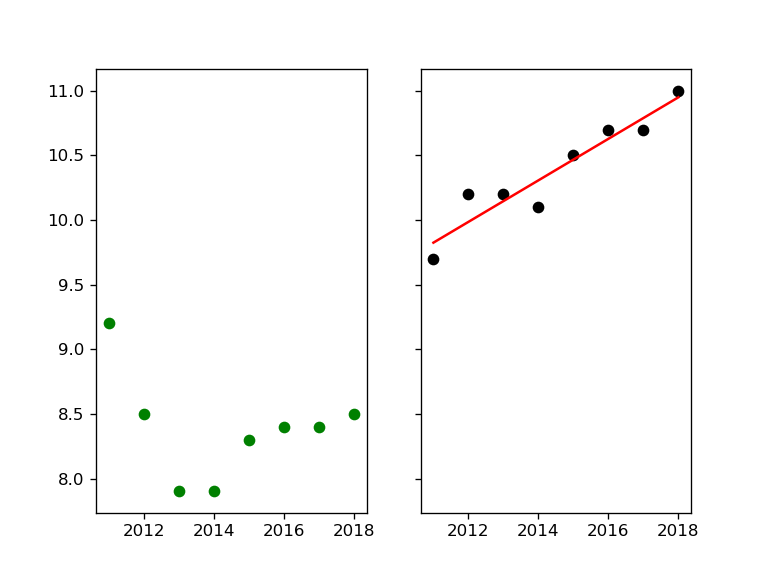

In [29]:
%matplotlib notebook
fig, (ax_natal, ax_mortal) = plt.subplots(1, 2, sharey=True, num="Gráfico interativo")

ax_natal.scatter( população.Ano, população.Natalidade, color="green")
ax_mortal.scatter( população.Ano, população.Mortalidade, color="black")
ax_mortal.plot(população.Ano, m * x + b, color="red")

Ao definir gráficos interativos, são acrescentadas ferramentas que lhe permitem interagir com o gráfico.

Experimente, por exemplo, com a ferramenta __Pan__. Pode arrastar o conteúdo do gráfico e os eixos são atualizados automaticamente.

### Exercício

Para aprender a trabalhar com o __pan__ e o __zoom__ interativo, diga em que dia(s) se verificaram registos irregulares de cados confirmados de COVID-19 em Portugal.

O gráfico é obtido com as seguintes instruções:

<IPython.core.display.Javascript object>


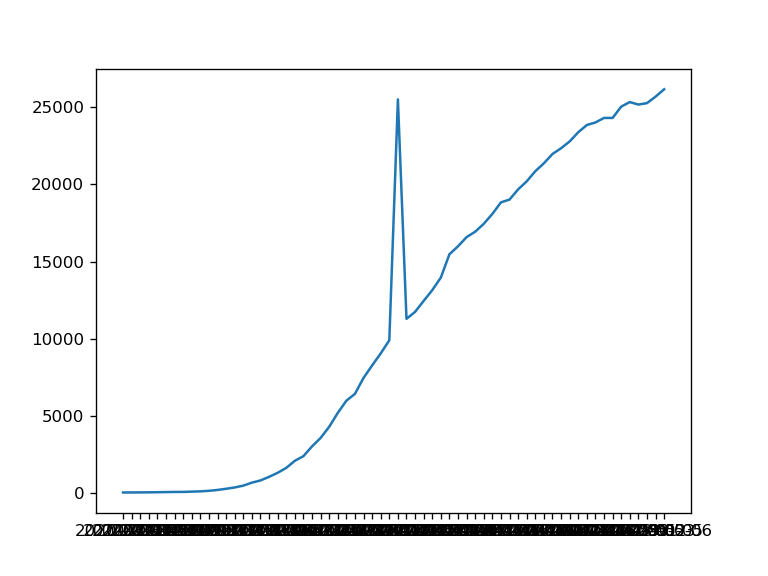

In [30]:
pandemia = pandas.read_csv('https://raw.githubusercontent.com/jgrocha/covid-pt/master/situacao_epidemiologica.csv')
confirmados = pandemia.sort_values(by=['data_relatorio'])[['data_relatorio', 'confirmados']]

%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(confirmados.data_relatorio, confirmados.confirmados)

### Resposta

### Exercício (resolvido)
Vamos mostrar as diferenças entre a mortalidade, por escalão e por sexo, para os dados COVID-19 disponibilizados pela DGS.

<IPython.core.display.Javascript object>


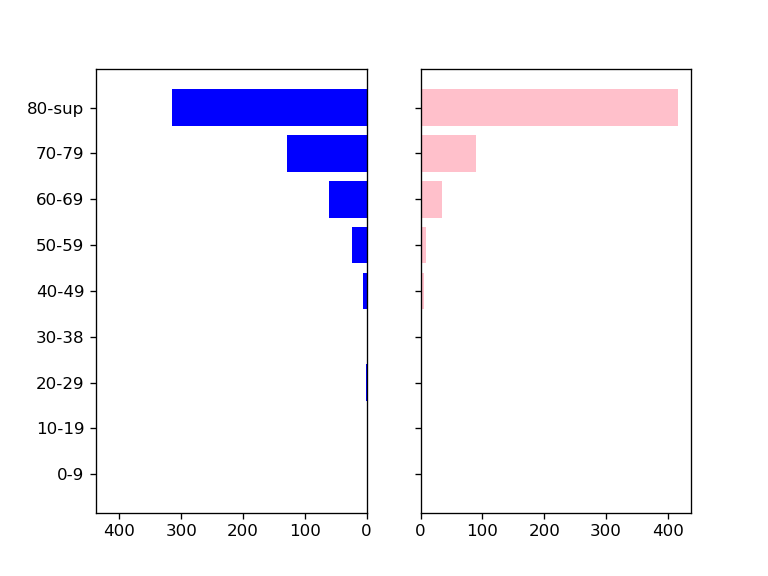

In [28]:
# pandemia
recente = pandemia.sort_values(by=['data_relatorio'], ascending=False).head(1)['data_relatorio'].values
recente[0]
feminino = pandemia.filter(regex=("obitos_feminino|data"))[ pandemia.data_relatorio == recente[0] ].values
masculino = pandemia.filter(regex=("obitos_masculino|data"))[ pandemia.data_relatorio == recente[0] ].values
# obitos_feminino_0_9 	obitos_feminino_10_19 	obitos_feminino_20_29 	obitos_feminino_30_39 	obitos_feminino_40_49 	obitos_feminino_50_59 	obitos_feminino_60_69 	obitos_feminino_70_79 	obitos_feminino_80_sup
obitos_feminino = feminino[0][1:]
obitos_masculino = masculino[0][1:]
escalões = '0-9', '10-19', '20-29', '30-38', '40-49', '50-59', '60-69', '70-79', '80-sup'

fig, (ax_masculino, ax_feminino) = plt.subplots(ncols=2, sharey=True)
ax_masculino.barh(escalões, obitos_masculino, align='center', color='blue')
ax_feminino.barh(escalões, obitos_feminino, align='center', color='pink')

ax_masculino.set_xlim(ax_feminino.get_xlim())
ax_masculino.invert_xaxis()

### Exercício

Faça um gráfico similar ao anterior para os casos confirmados, por escalão etário e por sexo, para a data mais recente.

### Exercício
Faça um gráfico de barras na horizontal, como os anteriores, para o total de casos confirmados ao longo do tempo. No eixo dos Y devem aparecer as datas, da mais recente para a mais antiga.